First of all, set the 'CODE_DIR' to where the model code are saved. This will change current working directory and print for checking. Afterwards, we import all required modules.

In [1]:
import os
CODE_DIR = '/lustre/fsn1/projects/rech/ggs/uri15na/3_code/styleGAN/pSp_encoder_constructive'
os.chdir(f'{CODE_DIR}')
print('Current working directory is:', '\n', CODE_DIR, '\n')

Current working directory is: 
 /lustre/fsn1/projects/rech/ggs/uri15na/3_code/styleGAN/pSp_encoder_constructive 



In [2]:
from base_functions.base_funcs import set_cuda_arch_list
set_cuda_arch_list()

Detected GPU: Tesla V100-SXM2-16GB
Setting TORCH_CUDA_ARCH_LIST to 7.0 for V100


In [6]:
import torch
import torchvision.transforms as transforms
from base_functions.model_funcs import process_recon_swap, load_pSp_cmlp_models
from base_functions.base_funcs import load_folder_images, transform_images_to_batch, show_images, display_images

In [7]:

EXPERIMENT_PARMS = {
        "model1_path": "./results/cmlp_baseline_h100/3Dmlp/checkpoints/iteration_130000.pt",
        "model2_path": "./results/cmlp_ffhq_glasses/iteration_130000.pt",
        "images_bg_path" : "./eval_images/test_bg_imgs/", 
        "images_t_path" : "./eval_images/test_t_imgs/", 
        "model_output_size" : 1024,
        "transform": transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]),
        "device": 'cuda'
}

In [8]:
model1_path = EXPERIMENT_PARMS['model1_path']
model2_path = EXPERIMENT_PARMS['model2_path']
image_bg_paths = EXPERIMENT_PARMS["images_bg_path"]
image_t_paths = EXPERIMENT_PARMS["images_t_path"]
transform = EXPERIMENT_PARMS['transform']
device =  EXPERIMENT_PARMS['device']

In [9]:
# %matplotlib inline
images_bg= load_folder_images(image_bg_paths, num_images=4, seed=None)
images_t= load_folder_images(image_t_paths, num_images=4, seed=None)
input_images_bg = transform_images_to_batch(images_bg, transform).to(device).float()
input_images_t = transform_images_to_batch(images_t, transform).to(device).float()

# custom_indices = torch.tensor([0, 1, 2, 3])  # Example custom order for batch size of 4
# input_images_bg = input_images_bg[custom_indices]
# custom_indices = torch.tensor([3, 2, 1, 0])
# input_images_t = input_images_t[custom_indices]

### Load pretrained pSp model

Loading pSp from checkpoint: ../pretrained_models/pSp_models/psp_ffhq_encode.pt
Loading csmlp from path: ./results/CA_with_RD/CA_from_145600/config1_lambda_s0.1_5e-4
Loading pSp from checkpoint: ../pretrained_models/pSp_models/psp_ffhq_encode.pt
Loading csmlp from path: results/csmlp_sparsity/mlp3D/nodim/



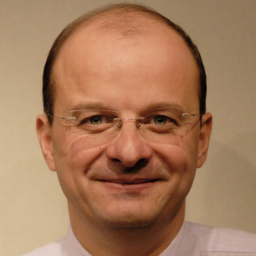
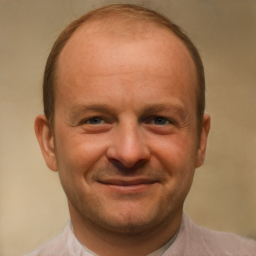
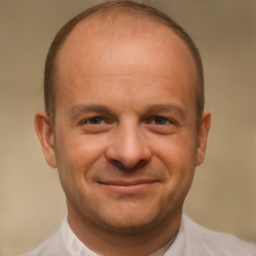
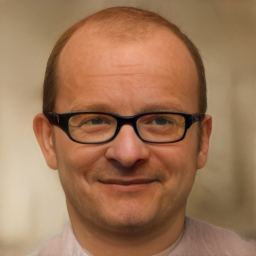
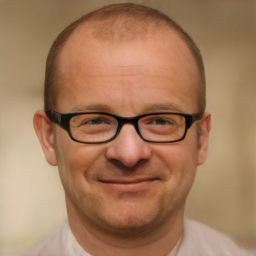


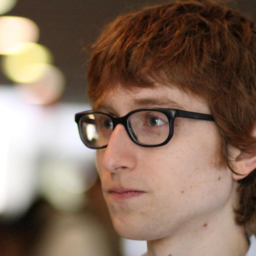
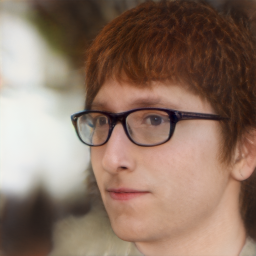
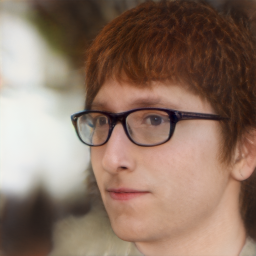
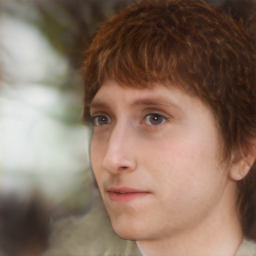
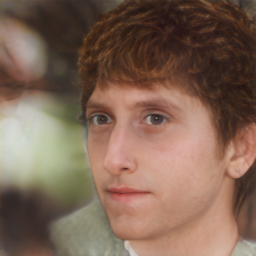


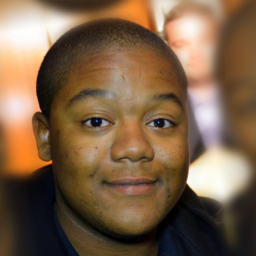
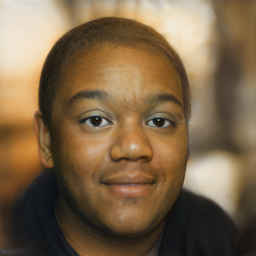
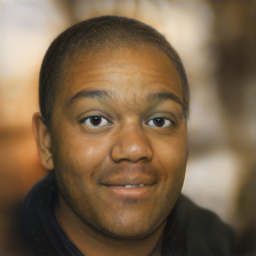
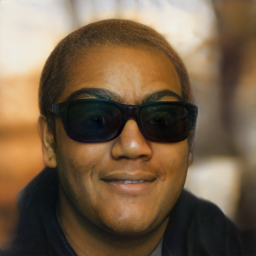
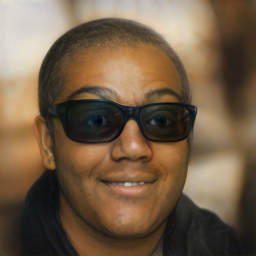


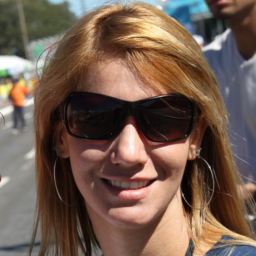
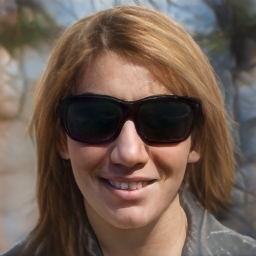
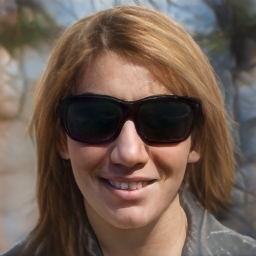
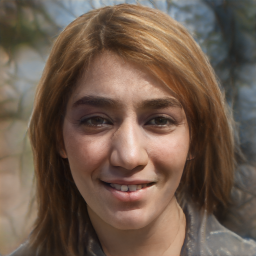
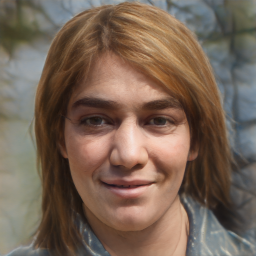


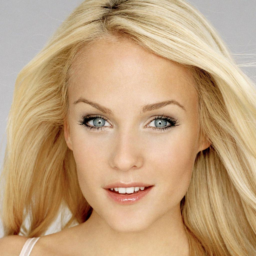
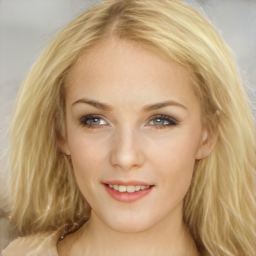
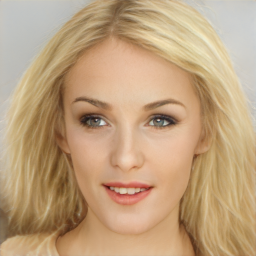
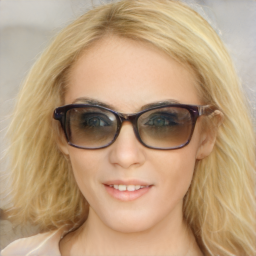
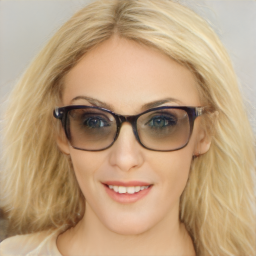


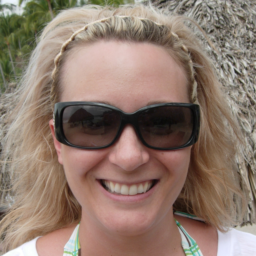
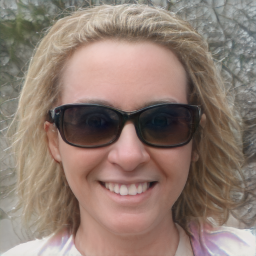
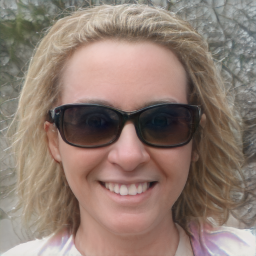
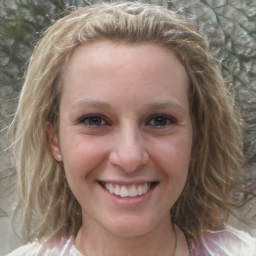
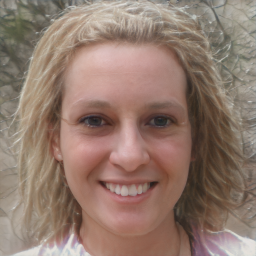


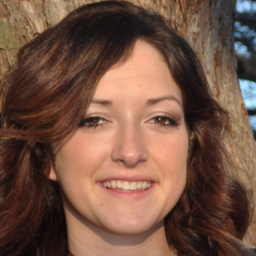
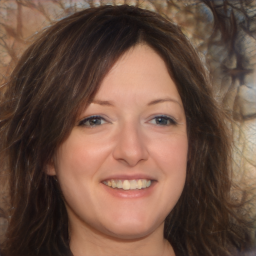
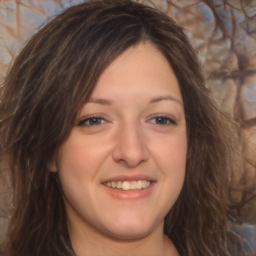
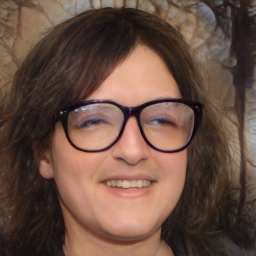
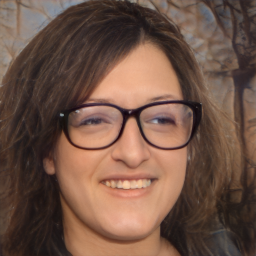


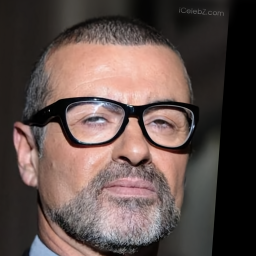
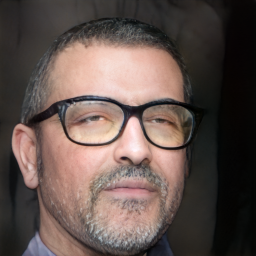
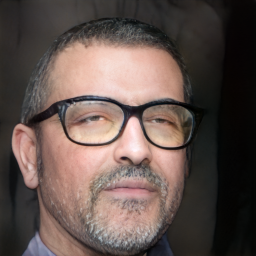
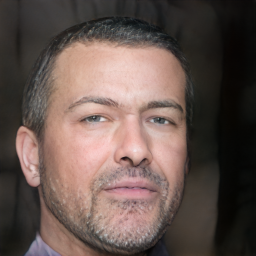
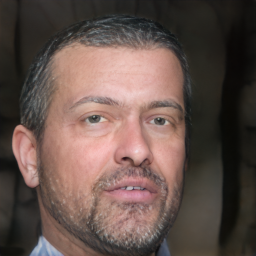

In [11]:
model1_path = "./results/CA_with_RD/CA_from_145600/config1_lambda_s0.1_lr5e-4/checkpoints/iteration_147200.pt"
model2_path = "./results/baseline/iteration_130000.pt"

pSp_net, cs_mlp_net, opts = load_models(model1_path, device=device)
pSp_net2, cs_mlp_net2, opts2 = load_models(model2_path, device=device)
output_latents, output_images = process_recon_swap(cs_mlp_net, pSp_net, input_images_bg, input_images_t, opts)
output_latents2, output_images2 = process_recon_swap(cs_mlp_net2, pSp_net2, input_images_bg, input_images_t, opts2)
  # Any number of images

# # # visulize_images_batch(recon_t, axis_dim=1)
n_images = input_images_bg.shape[0]

for i in range (n_images):
    display_images(input_images_bg[i,:,:,:], output_images['recon_bg'][i,:,:,:], output_images2['recon_bg'][i,:,:,:], \
                   output_images['swap_bg'][i,:,:,:], output_images2['swap_bg'][i,:,:,:])
    display_images(input_images_t[i,:,:,:], output_images['recon_t'][i,:,:,:], output_images['recon_t'][i,:,:,:] \
                  , output_images['swap_t'][i,:,:,:], output_images2['swap_t'][i,:,:,:])
    # visulize_singleImg_paired3(input_images_bg[i,:,:,:], recon_bg[i,:,:,:], swap_bg[i,:,:,:])
    # visulize_singleImg_paired3(input_images_t[i,:,:,:], recon_t[i,:,:,:], swap_t[i,:,:,:])

# output_images_1, output_latents_1 = evaluate_model(csmlp_net1, pSp_net1, input_images_bg, input_images_t, opts1)
